Importing **Lybraries**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin

Importing **Dataset** & Adding columns name



In [ ]:
data = pd.read_csv('NB_Dataset.txt', sep="\t", header=None)
data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'class']
X = data.iloc[:, data.columns != 'class'].values
y = data.iloc[:, -1].values
data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,3
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


Encoding the character variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
print(X)

[[2 0.455 0.365 ... 0.2245 0.10099999999999999 0.15]
 [2 0.35 0.265 ... 0.0995 0.0485 0.07]
 [0 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 [2 0.6 0.475 ... 0.5255 0.2875 0.308]
 [0 0.625 0.485 ... 0.531 0.261 0.29600000000000004]
 [2 0.71 0.555 ... 0.9455 0.3765 0.495]]


**1**-Gaussian Distribution
bold text

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=100, random_state=2)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_val) 
print("the accuracy is : " + str(round(accuracy_score(y_pred, y_val) * 100, 2)))
c_matrix = confusion_matrix(y_val, y_pred)
print("the confusion matrix  is :  \n "  + str(c_matrix))

the accuracy is : 59.23
the confusion matrix  is :  
 [[ 734   81    3]
 [ 529 1337  453]
 [  71  525  344]]


In [ ]:
print("Total misclassification errors:")
classification_errors = c_matrix[0][1]  + c_matrix[0][2] + c_matrix[1][0] + c_matrix[1][2] + c_matrix[2][0] + c_matrix[2][1]
print(classification_errors)
print("Accuracy of classification:")
accuracy = ((c_matrix[0][0] + c_matrix[1][1] + c_matrix[2][2]) / (len(X))) * 100
print("%s%%" % accuracy)

Total misclassification errors:
1662
Accuracy of classification:
57.81661479530764%


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=1000, random_state = 22)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_val)
print("the accuracy is : " + str(round(accuracy_score(y_pred, y_val) * 100, 2)))
c_matrix = confusion_matrix(y_val, y_pred)
print("the confusion matrix  is :  \n "  + str(c_matrix))

the accuracy is : 56.81
the confusion matrix  is :  
 [[556  65   4]
 [355 853 595]
 [ 45 308 396]]


In [ ]:
print("Total misclassification errors:")
classification_errors = c_matrix[0][1]  + c_matrix[0][2] + c_matrix[1][0] + c_matrix[1][2] + c_matrix[2][0] + c_matrix[2][1]
print(classification_errors)
print("Accuracy:")
accuracy = ((c_matrix[0][0] + c_matrix[1][1] + c_matrix[2][2]) / (len(X))) * 100
print("%s%%" % accuracy)

Total misclassification errors:
1372
Accuracy:
43.212832176203015%


# 2-Kernel Estimator
**bold text**

In [ ]:
class KDEClassifier(BaseEstimator, ClassifierMixin):
   
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7

[2 2 2 ... 2 2 2]


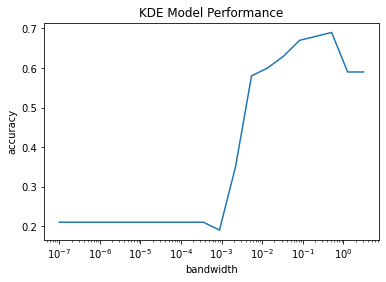

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=100, random_state=2)
bandwidths = 10 ** np.linspace(-7, 0.5, 20)
grid = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths})

grid.fit(X_train, y_train)
y_pred = grid.predict(X_val)
scores = grid.cv_results_['mean_test_score']

plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance')
print(y_pred)

In [ ]:
print("best bandwidth = {0}".format(grid.best_estimator_.bandwidth))
print('the best estimator for CV is : ', grid.best_score_ * 100)
print("the accuracy is : " + str(round(accuracy_score(y_pred, y_val) * 100, 2)))
c_matrix = confusion_matrix(y_val, y_pred)
print("the confusion matrix  is :  \n "  + str(c_matrix))

best bandwidth = 0.5134832907437549
the best estimator for CV is :  69.0
the accuracy is : 66.67
the confusion matrix  is :  
 [[ 572  246    0]
 [ 178 2128   13]
 [  16  906   18]]


In [ ]:
print("Total misclassification errors:")
classification_errors = c_matrix[0][1]  + c_matrix[0][2] + c_matrix[1][0] + c_matrix[1][2] + c_matrix[2][0] + c_matrix[2][1]
print(classification_errors)
print("Accuracy:")
accuracy = ((c_matrix[0][0] + c_matrix[1][1] + c_matrix[2][2]) / (len(X))) * 100
print("%s%%" % accuracy)

Total misclassification errors:
1359
Accuracy:
65.07062485037109%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7

Text(0.5, 1.0, 'KDE Model Performance')

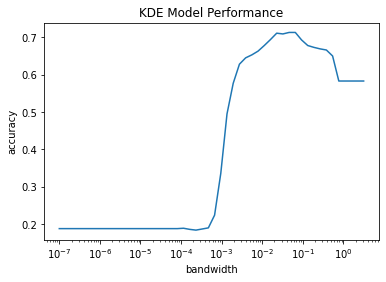

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=1000, random_state=2)
bandwidths = 10 ** np.linspace(-7, 0.5, 50)
grid1 = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths})

grid1.fit(X_train, y_train)
y_pred = grid1.predict(X_val)
scores = grid1.cv_results_['mean_test_score']

plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance')

In [ ]:
print("best bandwidth = {0}".format(grid.best_estimator_.bandwidth))
print('the best estimator for CV is : ', grid.best_score_ * 100)
print("the accuracy is : " + str(round(accuracy_score(y_pred, y_val) * 100, 2)))
c_matrix = confusion_matrix(y_val, y_pred)
print("the confusion matrix  is :  \n "  + str(c_matrix))

best bandwidth = 0.5134832907437549
the best estimator for CV is :  69.0
the accuracy is : 70.98
the confusion matrix  is :  
 [[ 440  210    1]
 [  86 1637   72]
 [   4  549  178]]


In [ ]:
print("Total misclassification errors:")
classification_errors = c_matrix[0][1]  + c_matrix[0][2] + c_matrix[1][0] + c_matrix[1][2] + c_matrix[2][0] + c_matrix[2][1]
print(classification_errors)
print("Accuracy:")
accuracy = ((c_matrix[0][0] + c_matrix[1][1] + c_matrix[2][2]) / (len(X))) * 100
print("%s%%" % accuracy)

Total misclassification errors:
922
Accuracy:
53.98611443619823%


**3-Naive Estimator**

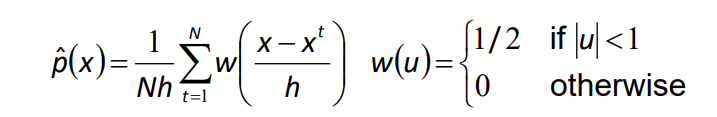

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=100, random_state=2)
X1=data['Diameter']
X2=data['Height']
X3=data['Whole weight']
X4=data['Shucked weight']
X5=data['Viscera weight']
X6=data['Shell weight']
X7=data['Length']
X8=data['Sex']
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=100, random_state=2)


In [ ]:
def calc_prior(features, target):
    rows = features.shape[0]
    prior = (features.groupby(target).apply(lambda x: len(x))/rows).to_numpy()
    return prior

In [ ]:
print(calc_prior(X1,y))

[0.20086186 0.56930812 0.22983002]


In [ ]:
def calculate_probability_density(data_array,x,bandwidth=0.1):

    def weight_est(x) :
        for row in x:
            if abs(row) >= 1 :
                return 1/2
            else : 
                return 0

    N=len(data_array)
    res=0

    if len(data_array)==0:
        return 0

    for i in range(len(data_array)):

        res += weight_est((x-data_array[i])/bandwidth)

    res /= (N*bandwidth)

    return res 

In [ ]:
calculate_probability_density(X1,X1,0.2)

0.09576250897773521

In [ ]:
def _calc_predictor_prior(self):
		for feature in self.features:
			feat_vals = self.X_train[feature].value_counts().to_dict()

			for feat_val, count in feat_vals.items():
				self.pred_priors[feature][feat_val] = count/self.train_size

In [ ]:
   def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.calculate_probability_density(i, x, bandwith))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]